In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("WineQuality.csv")
data.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine
3,3264,6.9,0.260,0.29,4.2,0.043,33.0,114.0,0.99020,3.16,0.31,12.5,6,White Wine
4,4931,6.4,0.450,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8,5,White Wine


In [3]:
data.shape

(32485, 14)

In [4]:
data = data.drop(['Unnamed: 0'],axis=1)


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

<Axes: xlabel='quality', ylabel='count'>

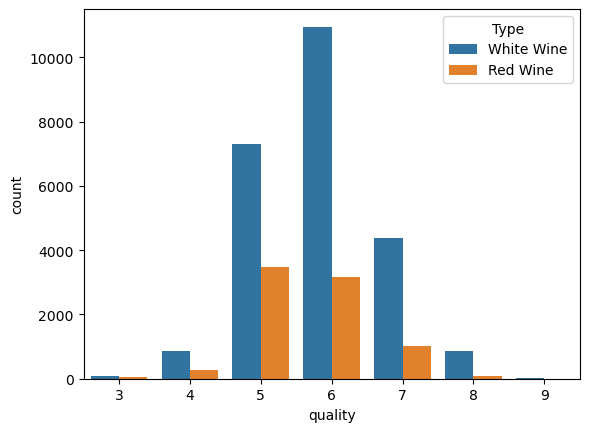

In [6]:
sns.countplot(data=data,x=data['quality'],hue='Type')

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

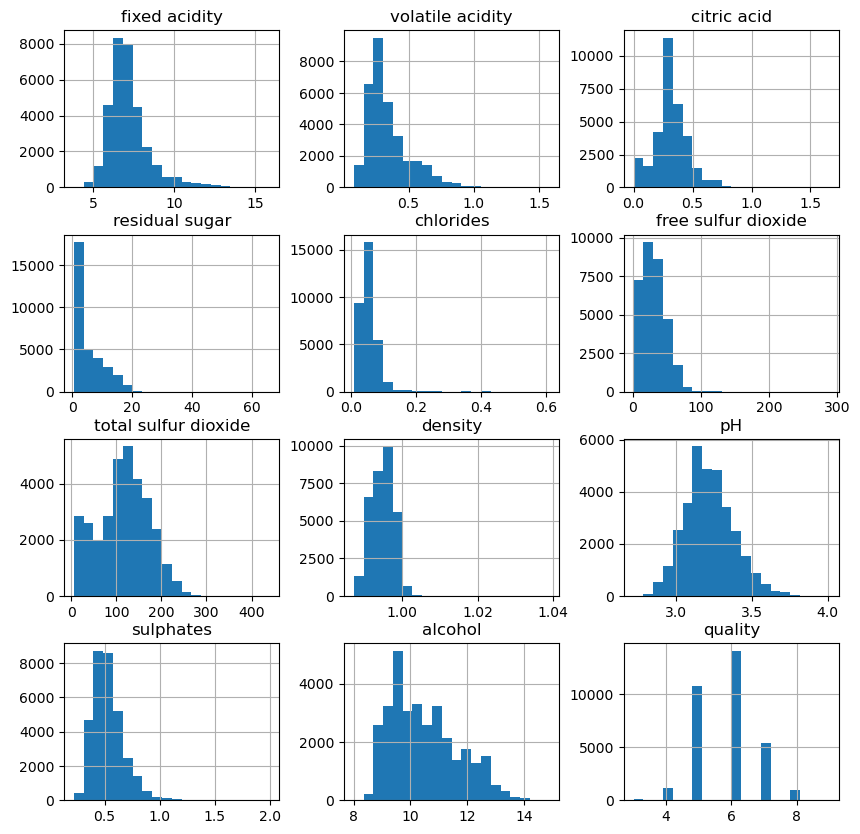

In [7]:
data.hist(bins=20, figsize=(10,10))

In [8]:
# label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Type']=encoder.fit_transform(data['Type'])

<Axes: >

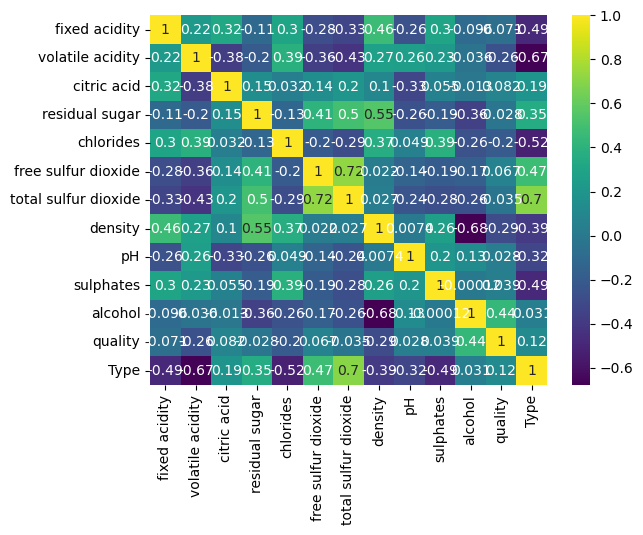

In [9]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
count,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000,32485.000000
mean,7.214736,0.340122,0.318324,5.438696,0.056009,30.458258,115.656303,0.994719,3.219089,0.531500,10.480694,5.811698,0.752747
std,1.308216,0.164912,0.145152,4.799221,0.034503,17.608076,56.456074,0.003015,0.161441,0.148712,1.190661,0.872474,0.431421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992400,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.410000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(data)

In [12]:
from sklearn.utils import resample
# handling unbalanced data (using resampling)
# assuming we want to balance the classes
minority_classes=data[data['quality'].isin([3,4,8,9])]
majority_classes=data[~data['quality'].isin([3,4,8,9])]

# upsample minority classes
minority_unsampled=resample(minority_classes,replace=True,n_samples=len(majority_classes),random_state=42)
# combine majority class with umsampled minority classes

balanced_data=pd.concat([majority_classes,minority_unsampled])

In [13]:
from sklearn.model_selection import train_test_split
x_balanced=balanced_data.drop('quality',axis=1)
y_balanced=balanced_data['quality']
x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,test_size=0.2,random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt_model=dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

In [15]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       356
           4       1.00      1.00      1.00      3087
           5       0.99      0.99      0.99      2101
           6       0.99      0.99      0.99      2807
           7       0.99      0.99      0.99      1082
           8       1.00      1.00      1.00      2595
           9       1.00      1.00      1.00        70

    accuracy                           1.00     12098
   macro avg       1.00      1.00      1.00     12098
weighted avg       1.00      1.00      1.00     12098



In [16]:
y_train_pred=dt.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

Training Accuracy: 1.0


In [17]:
y_test_pred=dt.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_pred)
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.995949743759299


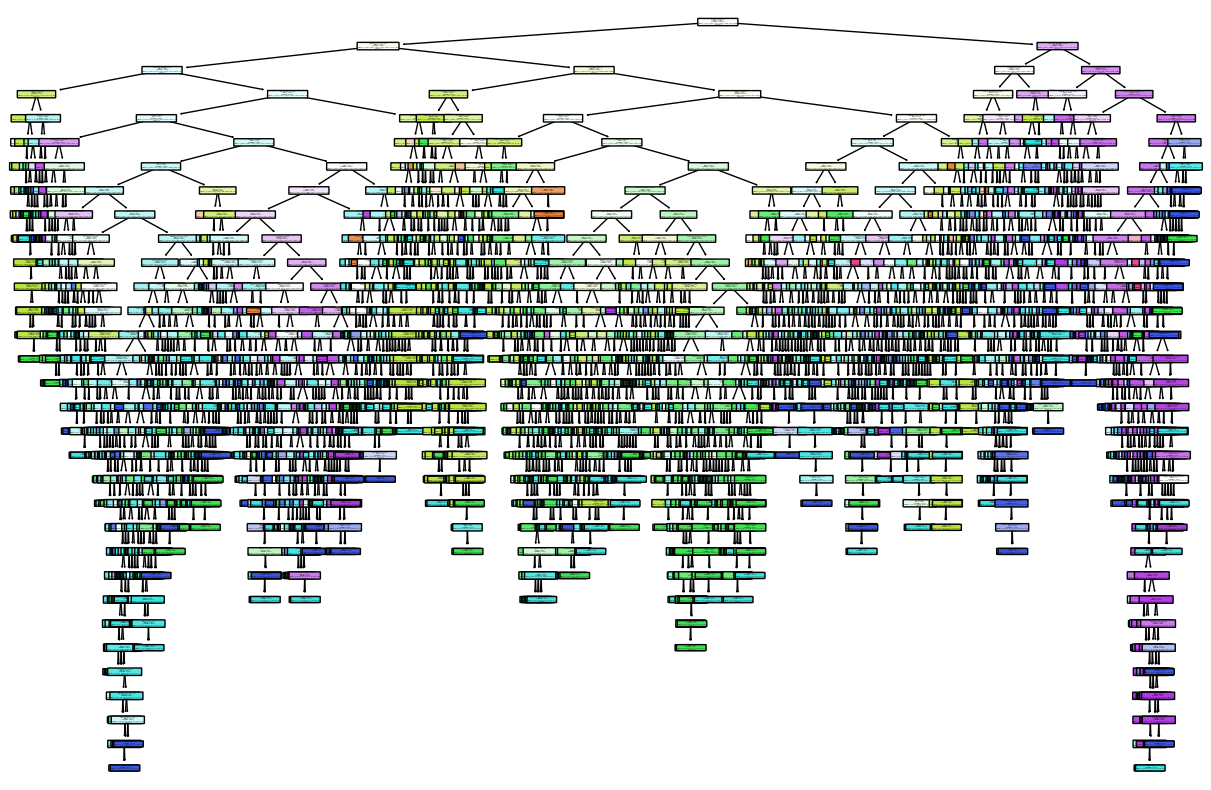

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# convert class labels to strings
class_names=y_balanced.unique().astype(str)
feature_names = list(data.columns)


#create a mapping of class labels to strings
class_mapping={str(i): class_name for i, class_name in enumerate(class_names)}

# convert class labels in y to strings using the mapping
y_as_strings=y_balanced.astype(str).map(class_mapping)
plt.figure(figsize=(15,10))
plot_tree(dt,filled=True,feature_names=feature_names,class_names=list(class_mapping.values()),rounded=True,proportion=True)
plt.show()

[Text(0.5962084247786719, 0.984375, 'x[10] <= 11.675\ngini = 0.796\nsamples = 48388\nvalue = [1444.0, 12294.0, 8654.0, 11310.0, 4289.0, 10148.0, 249.0]'),
 Text(0.30396380755562363, 0.953125, 'x[1] <= 0.267\ngini = 0.772\nsamples = 36585\nvalue = [1301, 11310, 8372, 9175, 2453, 3897, 77]'),
 Text(0.11813233541722443, 0.921875, 'x[5] <= 9.5\ngini = 0.781\nsamples = 14018\nvalue = [437.0, 2039.0, 2176.0, 4663.0, 1606.0, 3097.0, 0.0]'),
 Text(0.010121495858526508, 0.890625, 'x[4] <= 0.048\ngini = 0.488\nsamples = 824\nvalue = [21.0, 571.0, 94.0, 106.0, 32.0, 0.0, 0.0]'),
 Text(0.004473170454330067, 0.859375, 'x[10] <= 10.05\ngini = 0.324\nsamples = 701\nvalue = [21, 571, 64, 41, 4, 0, 0]'),
 Text(0.001819594761083417, 0.828125, 'x[0] <= 10.0\ngini = 0.646\nsamples = 50\nvalue = [21, 0, 18, 11, 0, 0, 0]'),
 Text(0.0012130631740556114, 0.796875, 'x[1] <= 0.215\ngini = 0.471\nsamples = 29\nvalue = [0, 0, 18, 11, 0, 0, 0]'),
 Text(0.0006065315870278057, 0.765625, 'gini = 0.0\nsamples = 18\nva

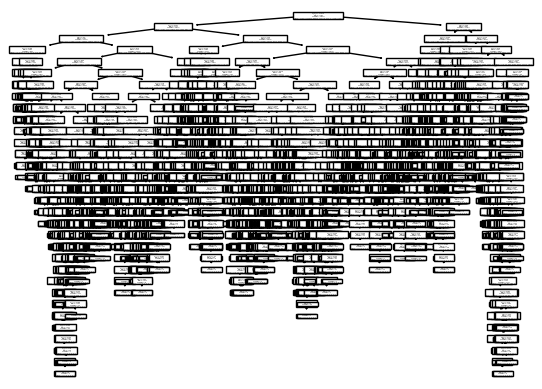

In [19]:
from sklearn import tree
tree.plot_tree(dt)

In [21]:
import joblib
joblib.dump(dt,'decision tree.joblib')

['decision tree.joblib']